# Test 1: Data Overview - K means on all data at different granularities and $nc$

In [1]:
import sys
sys.path.append('C:\\Users\\sumaiyah\\Documents\\Univeristy\\diss\\AIaaS\\real-world-data')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from timeit import default_timer as timer
# from statistics import mean

from timeit import default_timer as timer
# from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

from notebooks import FIC_FED_AMA_10minute_7days_filepath, FIC_FED_AMA_60minute_7days_filepath

# 60 min

In [102]:
FIC_FED_AMA_60minute_7days_df = pd.read_pickle(FIC_FED_AMA_60minute_7days_filepath)

# Rename columns of merged dataframe depending on what m is
m = 60
col_names = ['HashOwner', 'HashApp', 'HashFunction','Trigger'] + \
            ['fic_%d' % i for i in range(int(7 * (1440 / m)))] + \
            ['fed_%d' % i for i in range(int(7 * (1440 / m)))] + \
            ['ama_%d' % i for i in range(int(7 * (1440 / m)))]
FIC_FED_AMA_60minute_7days_df.columns = col_names
FIC_FED_AMA_60minute_7days_df = FIC_FED_AMA_60minute_7days_df.drop(columns=FIC_FED_AMA_60minute_7days_df.columns[0:4])

In [3]:
# Preprocess data - Log normalise values
FIC_FED_AMA_60minute_7days_df = (FIC_FED_AMA_60minute_7days_df + 1).apply(np.log)

In [129]:
nc = [2, 3, 5, 9, 30]

## kmeans

In [4]:
from sklearn.cluster import KMeans

In [131]:
for k in nc:
    print('Results of K-means Clustering with k=%d' % k)
    
    start = timer()

    km = KMeans(n_clusters=k)
    kmeans_predictions = km.fit_predict(FIC_FED_AMA_60minute_7days_df.values)

    end = timer()
    print('Clustering k=%d took %f seconds' % (k, (end - start)))

    km_clusters = pd.Series(kmeans_predictions)
    print(km_clusters.value_counts().values.tolist(), '\n')

Results of K-means Clustering with k=2
Clustering k=2 took 4.841056 seconds
[48269, 13861] 

Results of K-means Clustering with k=3
Clustering k=3 took 11.598128 seconds
[45468, 11012, 5650] 

Results of K-means Clustering with k=5
Clustering k=5 took 15.592485 seconds
[41647, 7405, 5249, 4429, 3400] 

Results of K-means Clustering with k=9
Clustering k=9 took 20.247053 seconds
[39769, 5624, 3940, 3222, 3069, 2234, 1738, 1614, 920] 

Results of K-means Clustering with k=30
Clustering k=30 took 54.777775 seconds
[33405, 4560, 2322, 1698, 1596, 1586, 1508, 1429, 1265, 1170, 1154, 1098, 1069, 961, 895, 865, 664, 575, 574, 535, 500, 486, 439, 355, 347, 299, 223, 193, 185, 174] 



# 10 min

In [132]:
FIC_FED_AMA_10minute_7days_df = pd.read_pickle(FIC_FED_AMA_10minute_7days_filepath)

# Rename columns of merged dataframe depending on what m is
m = 10
col_names = ['HashOwner', 'HashApp', 'HashFunction','Trigger'] + \
            ['fic_%d' % i for i in range(int(7 * (1440 / m)))] + \
            ['fed_%d' % i for i in range(int(7 * (1440 / m)))] + \
            ['ama_%d' % i for i in range(int(7 * (1440 / m)))]
FIC_FED_AMA_10minute_7days_df.columns = col_names
FIC_FED_AMA_10minute_7days_df = FIC_FED_AMA_10minute_7days_df.drop(columns=FIC_FED_AMA_10minute_7days_df.columns[0:4])

In [133]:
# Preprocess data - Log normalise values
FIC_FED_AMA_10minute_7days_df = (FIC_FED_AMA_10minute_7days_df + 1).apply(np.log)

## kmeans

In [134]:
for k in nc:
    print('Results of K-means Clustering with k=%d' % k)
    
    start = timer()

    km = KMeans(n_clusters=k)
    kmeans_predictions = km.fit_predict(FIC_FED_AMA_10minute_7days_df.values)

    end = timer()
    print('Clustering k=%d took %f seconds' % (k, (end - start)))

    km_clusters = pd.Series(kmeans_predictions)
    print(km_clusters.value_counts().values.tolist(), '\n')

Results of K-means Clustering with k=2
Clustering k=2 took 22.700540 seconds
[51872, 10258] 

Results of K-means Clustering with k=3
Clustering k=3 took 45.834984 seconds
[49563, 8030, 4537] 

Results of K-means Clustering with k=5
Clustering k=5 took 68.417395 seconds
[46292, 6351, 5514, 2691, 1282] 

Results of K-means Clustering with k=9
Clustering k=9 took 123.505376 seconds
[44725, 4665, 3401, 2515, 1967, 1543, 1387, 1069, 858] 

Results of K-means Clustering with k=30
Clustering k=30 took 305.846087 seconds
[41209, 4464, 1726, 1325, 1130, 1116, 1023, 998, 971, 929, 856, 770, 536, 535, 522, 457, 443, 439, 408, 372, 306, 296, 247, 208, 195, 192, 180, 144, 81, 52] 



# 1 min

In [ ]:
# Ran this on HPCS

-------------------

# Figs

In [2]:
# 60 minutes
FIC_FED_AMA_60minute_7days_df = pd.read_pickle(FIC_FED_AMA_60minute_7days_filepath)
# Rename columns of merged dataframe depending on what m is
m = 60
col_names = ['HashOwner', 'HashApp', 'HashFunction','Trigger'] + \
            ['fic_%d' % i for i in range(int(7 * (1440 / m)))] + \
            ['fed_%d' % i for i in range(int(7 * (1440 / m)))] + \
            ['ama_%d' % i for i in range(int(7 * (1440 / m)))]
FIC_FED_AMA_60minute_7days_df.columns = col_names
FIC_FED_AMA_60minute_7days_df = FIC_FED_AMA_60minute_7days_df.drop(columns=FIC_FED_AMA_60minute_7days_df.columns[0:4])
FIC_FED_AMA_60minute_7days_df_norm = (FIC_FED_AMA_60minute_7days_df + 1).apply(np.log)

# 10 minutes
FIC_FED_AMA_10minute_7days_df = pd.read_pickle(FIC_FED_AMA_10minute_7days_filepath)
# Rename columns of merged dataframe depending on what m is
m = 10
col_names = ['HashOwner', 'HashApp', 'HashFunction','Trigger'] + \
            ['fic_%d' % i for i in range(int(7 * (1440 / m)))] + \
            ['fed_%d' % i for i in range(int(7 * (1440 / m)))] + \
            ['ama_%d' % i for i in range(int(7 * (1440 / m)))]
FIC_FED_AMA_10minute_7days_df.columns = col_names
FIC_FED_AMA_10minute_7days_df = FIC_FED_AMA_10minute_7days_df.drop(columns=FIC_FED_AMA_10minute_7days_df.columns[0:4])
FIC_FED_AMA_10minute_7days_df_norm = (FIC_FED_AMA_10minute_7days_df + 1).apply(np.log)

In [6]:
k = 5

print('Results of K-means Clustering at 60 min granularity with k=%d' % k)
km = KMeans(n_clusters=k)
kmeans_predictions = km.fit_predict(FIC_FED_AMA_60minute_7days_df_norm.values)
km_clusters_60min = pd.Series(kmeans_predictions)
print(km_clusters_60min.value_counts().values.tolist(), '\n')

print('Results of K-means Clustering at 10 min granularity with k=%d' % k)
km = KMeans(n_clusters=k)
kmeans_predictions = km.fit_predict(FIC_FED_AMA_10minute_7days_df_norm.values)
km_clusters_10min = pd.Series(kmeans_predictions)
print(km_clusters_10min.value_counts().values.tolist(), '\n')

Results of K-means Clustering at 60 min granularity with k=5
[41647, 7405, 5249, 4429, 3400] 

Results of K-means Clustering at 10 min granularity with k=5
[46299, 6350, 5509, 2691, 1281] 



In [7]:
km_clusters_1min = pd.read_pickle('1min_7days_kmeans_nc5.pkl')

In [8]:
# Rainbow order
colours = ['tab:red', 'tab:orange', 'gold', 'tab:green', 'tab:blue', 'tab:purple', 'tab:pink', 'tab:gray', 'tab:brown']

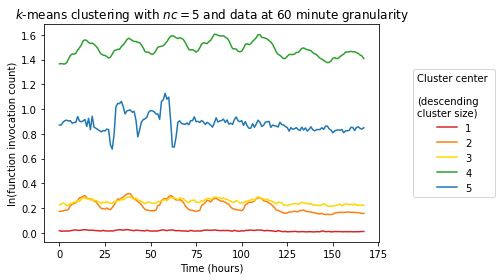

In [11]:
FIC_FED_AMA_60minute_7days_df_norm['cluster'] = km_clusters_60min
cluster_order = pd.Series(km_clusters_60min).value_counts().keys().tolist()

for yi in range(len(cluster_order)):
    cluster_index = cluster_order[yi]
    plt.plot(FIC_FED_AMA_60minute_7days_df_norm.groupby('cluster').mean().values[cluster_index][:168], color=colours[yi])

# show a legend on the plot
plt.legend(# The line objects
           labels=['%d' % (i+1) for i in range(k)],   # The labels for each line
           loc='center left', bbox_to_anchor=(1.1, 0.5),  # Position of legend
           borderaxespad=0.1,    # Small spacing around legend box
           title="Cluster center \n\n(descending\ncluster size)"  # Title for the legend
           )

plt.title('$k$-means clustering with $nc=5$ and data at 60 minute granularity')
plt.xlabel('Time (hours)')
plt.ylabel('ln(function invocation count)')

plt.show()

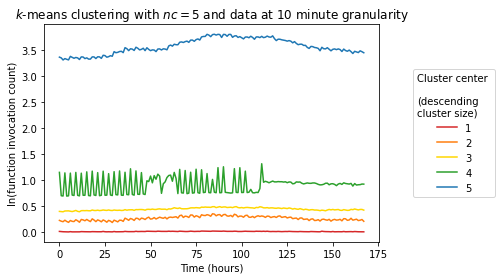

In [13]:
FIC_FED_AMA_10minute_7days_df_norm['cluster'] = km_clusters_10min
cluster_order = pd.Series(km_clusters_10min).value_counts().keys().tolist()

for yi in range(len(cluster_order)):
    cluster_index = cluster_order[yi]
    plt.plot(FIC_FED_AMA_10minute_7days_df_norm.groupby('cluster').mean().values[cluster_index][:168], color=colours[yi])

# show a legend on the plot
plt.legend(# The line objects
           labels=['%d' % (i+1) for i in range(k)],   # The labels for each line
           loc='center left', bbox_to_anchor=(1.1, 0.5),  # Position of legend
           borderaxespad=0.1,    # Small spacing around legend box
           title="Cluster center \n\n(descending\ncluster size)"  # Title for the legend
           )

plt.title('$k$-means clustering with $nc=5$ and data at 10 minute granularity')
plt.xlabel('Time (hours)')
plt.ylabel('ln(function invocation count)')

plt.show()

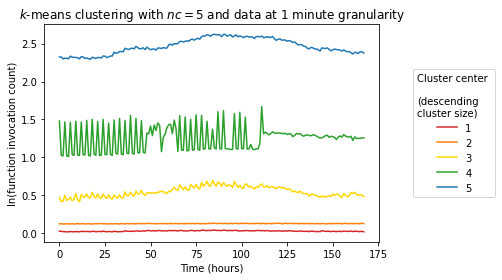

In [36]:
FIC_FED_AMA_1minute_7days_df_norm = FIC_FED_AMA_10minute_7days_df_norm
FIC_FED_AMA_1minute_7days_df_norm['cluster'] = km_clusters_1min

cluster_order = pd.Series(km_clusters_1min).value_counts().keys().tolist()
for yi in range(len(cluster_order)):
    cluster_index = cluster_order[yi]
    plt.plot(FIC_FED_AMA_1minute_7days_df_norm.groupby('cluster').mean().values[cluster_index][:168], color=colours[yi])

# show a legend on the plot
plt.legend(# The line objects
           labels=['%d' % (i+1) for i in range(k)],   # The labels for each line
           loc='center left', bbox_to_anchor=(1.1, 0.5),  # Position of legend
           borderaxespad=0.1,    # Small spacing around legend box
           title="Cluster center \n\n(descending\ncluster size)"  # Title for the legend
           )

plt.title('$k$-means clustering with $nc=5$ and data at 1 minute granularity')
plt.xlabel('Time (hours)')
plt.ylabel('ln(function invocation count)')

plt.show()

----

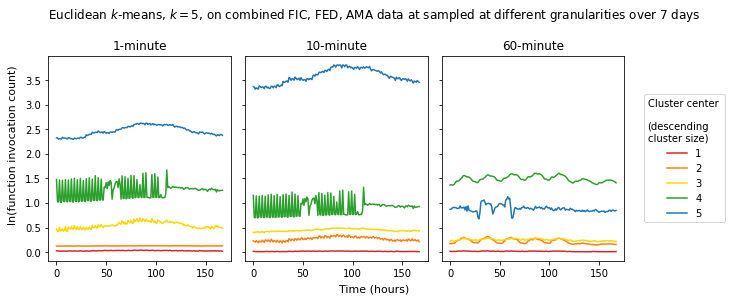

In [60]:
fig, ax = plt.subplots(1, 3, figsize=(10, 4), sharex=True, sharey=True)

fig.text(0.5, -0.01, 'Time (hours)', ha='center', fontsize=11)
fig.text(-0.01, 0.5, 'ln(function invocation count)', va='center', rotation='vertical', fontsize=11)
fig.suptitle("Euclidean $k$-means, $k=5$, on combined FIC, FED, AMA data at sampled at different granularities over 7 days")

# 1 minute
ax[0].title.set_text('1-minute')
FIC_FED_AMA_1minute_7days_df_norm = FIC_FED_AMA_10minute_7days_df_norm
FIC_FED_AMA_1minute_7days_df_norm['cluster'] = km_clusters_1min
cluster_order = FIC_FED_AMA_1minute_7days_df_norm['cluster'].value_counts().keys().tolist()
for yi in range(len(cluster_order)):
    cluster_index = cluster_order[yi]
    ax[0].plot(FIC_FED_AMA_1minute_7days_df_norm.groupby('cluster').mean().values[cluster_index][:168], color=colours[yi])

# 10 minute
ax[1].title.set_text('10-minute')
FIC_FED_AMA_10minute_7days_df_norm['cluster'] = km_clusters_10min
cluster_order = FIC_FED_AMA_10minute_7days_df_norm['cluster'].value_counts().keys().tolist()
for yi in range(len(cluster_order)):
    cluster_index = cluster_order[yi]
    ax[1].plot(FIC_FED_AMA_10minute_7days_df_norm.groupby('cluster').mean().values[cluster_index][:168], color=colours[yi])

# 60 minute
ax[2].title.set_text('60-minute')
FIC_FED_AMA_60minute_7days_df_norm['cluster'] = km_clusters_60min
cluster_order = FIC_FED_AMA_60minute_7days_df_norm['cluster'].value_counts().keys().tolist()
for yi in range(len(cluster_order)):
    cluster_index = cluster_order[yi]
    ax[2].plot(FIC_FED_AMA_60minute_7days_df_norm.groupby('cluster').mean().values[cluster_index][:168], color=colours[yi])


# show a legend on the plot
ax[2].legend(# The line objects
           labels=['%d' % (i+1) for i in range(k)],   # The labels for each line
           loc='center left', bbox_to_anchor=(1.1, 0.5),  # Position of legend
           borderaxespad=0.1,    # Small spacing around legend box
           title="Cluster center \n\n(descending\ncluster size)"  # Title for the legend
           )

plt.tight_layout()

plt.savefig('test_1_times.png', dpi=500, bbox_inches = "tight")
plt.show()